### Import all basic libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Import Dataset

In [41]:
path = "dataset.csv"

df = pd.read_csv(path)
if (df.empty):
    print("Dataset not loaded")
else:
    print("Dataset loaded successfully")


print("Path to dataset files:", path)

df.head()

Dataset loaded successfully
Path to dataset files: dataset.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Clean Data

In [42]:
# Check for missing values
df.isnull().sum()  # No missing values

# Drop customerID column
df.drop(columns=["customerID"], inplace=True)

# Convert TotalCharges to float
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")  # Replace empty strings
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")  # Convert to float

# Convert binary categorical columns to 1/0
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
df["MultipleLines"] = df["MultipleLines"].map({"Yes": 1, "No": 0, "No phone service": 0})

# Convert "No internet service" to "No" for consistency
df["OnlineSecurity"] = df["OnlineSecurity"].replace({"No internet service": "No"})
df["OnlineBackup"] = df["OnlineBackup"].replace({"No internet service": "No"})
df["DeviceProtection"] = df["DeviceProtection"].replace({"No internet service": "No"})
df["TechSupport"] = df["TechSupport"].replace({"No internet service": "No"})
df["StreamingTV"] = df["StreamingTV"].replace({"No internet service": "No"})
df["StreamingMovies"] = df["StreamingMovies"].replace({"No internet service": "No"})

# Convert remaining binary columns to 1/0
df["OnlineSecurity"] = df["OnlineSecurity"].map({"Yes": 1, "No": 0})
df["OnlineBackup"] = df["OnlineBackup"].map({"Yes": 1, "No": 0})
df["DeviceProtection"] = df["DeviceProtection"].map({"Yes": 1, "No": 0})
df["TechSupport"] = df["TechSupport"].map({"Yes": 1, "No": 0})
df["StreamingTV"] = df["StreamingTV"].map({"Yes": 1, "No": 0})
df["StreamingMovies"] = df["StreamingMovies"].map({"Yes": 1, "No": 0})


# One-Hot Encode categorical columns (drop first to avoid redundancy) --> e.g if we have a column for "Fibre Optic", "DSL", "No", we can drop the "No" column because if the other two are 0, then it's "No"
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# Convert PaperlessBilling and Churn to binary
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Final check
print(df.info())  # Verify all columns are numerical
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


### Train Model

Validation Accuracy: 0.7907801418439716
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       417
           1       0.62      0.50      0.55       147

    accuracy                           0.79       564
   macro avg       0.73      0.70      0.71       564
weighted avg       0.78      0.79      0.78       564

Test Accuracy: 0.7943262411347518
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       108
           1       0.58      0.42      0.49        33

    accuracy                           0.79       141
   macro avg       0.71      0.67      0.68       141
weighted avg       0.78      0.79      0.78       141



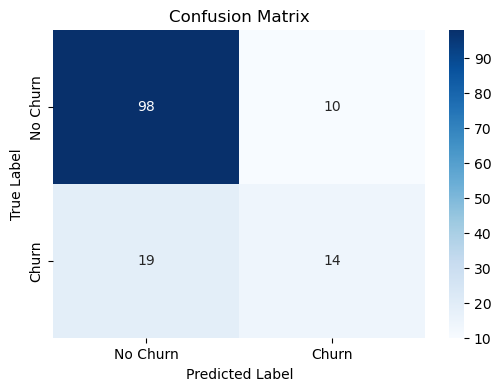

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features and target variable
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Fit the model on the training data
gbc.fit(X_train, y_train)

cross_val_score(gbc, X_train, y_train, cv=3).mean()

# Predict on the validation data
y_val_pred = gbc.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(val_report)

# Predict on the test data
y_test_pred = gbc.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(test_report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10, 50, 100, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1.0],
    "max_depth": [3, 5, 7, 9]
}

# Initialize the GridSearchCV with GradientBoostingClassifier
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best score: 0.8032487827876493


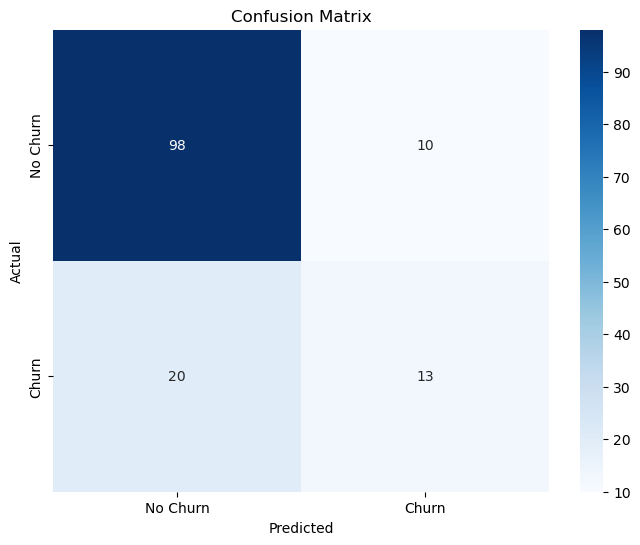

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
